In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

##https://www.tensorflow.org/datasets/splits

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
from tensorflow import keras
(X, y), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are Numpy arrays)
X = X.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# y_train = y_train.astype('float32')
# y_test = y_test.astype('float32')

# Reserve 10,000 samples for validation
# x_val = x_train[-10000:]
# y_val = y_train[-10000:]
# x_train = x_train[:-10000]
# y_train = y_train[:-10000]

In [12]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# x_train.shape, x_val.shape

In [13]:
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss='sparse_categorical_crossentropy',
              # List of metrics to monitor
              metrics=['sparse_categorical_accuracy'],
              run_eagerly=True
              )

In [14]:
hist = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=3,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    verbose=0,
                    validation_data=(x_val, y_val)
                    )

# print('\nhistory dict:', hist.history)

In [15]:
# model.loss

In [16]:
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
predictions = model.predict(x_test[2:3])
# predictions

79/79 [==============================] - 1s 17ms/step - loss: 2.2482 - sparse_categorical_accuracy: 0.3041
test loss, test acc: [2.2481930255889893, 0.30410000681877136]


#Boston Housing Price dataset with Keras

##normalizing features

In [17]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# Example image data, with values in the [0, 255] range
training_data = np.random.randint(0, 256, size=(64, 200, 200, 3)).astype("float32")

normalizer = Normalization(axis=-1)
normalizer.adapt(training_data)

normalized_data = normalizer(training_data)
# print("training_data : ", training_data)
# print("var: %.4f" % np.var(normalized_data))
# print("mean: %.4f" % np.mean(normalized_data))

In [18]:
from tensorflow.keras.datasets import boston_housing

(X, y), (x_test, y_test) = boston_housing.load_data()
# print(X.shape, type(X))

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# x_test = scaler.transform(x_test)

# from tensorflow.keras.layers.experimental.preprocessing import Normalization
# normalizer = Normalization(axis=-1)
# normalizer.adapt(X)
# X = normalizer(X).numpy()
# x_test = normalizer(x_test).numpy()

# X.shape, y.shape, x_test.shape, y_test.shape, type(X), type(y), type(x_test), type(y_test)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [20]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [21]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2,verbose=0)

In [22]:
# results = model.evaluate(x_test, y_test)
# results

In [23]:
predictions = model.predict(x_test[:3])
# predictions, y_test[:3]

In [24]:
predictions = model.predict(x_test[7:10])
# predictions, y_test[7:10]

In [25]:
# model.__str__

## Compare Optimizer

In [26]:
from tensorflow.keras import optimizers
# learning_rate=0.01
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'Adamax', 'Ftrl', 'Nadam', 'RMSprop', 'SGD']
for optimizer in optimizers:
  model = tf.keras.Sequential()
  model.add(layers.Input(shape=x_train.shape[1]))
  model.add(layers.Dense(128, activation='sigmoid'))
  model.add(layers.Dense(1))
  model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae'])
  model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2,verbose=0)
  predictions = model.predict(x_test[:3])
  # print(optimizer ,predictions, y_test[:3])

## Compare loss

In [27]:
from tensorflow.keras import losses
# https://keras.io/api/losses/
# Probabilistic losses
# losses_name = ['binary_crossentropy','categorical_crossentropy','sparse_categorical_crossentropy','poisson', 'kl_divergence',] 
# Regression losses
losses_name = ['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error', 'cosine_similarity', 'huber_loss', 'logcosh']
# Hinge losses for "maximum-margin" classification
# losses_name = ['hinge', 'squared_hinge', 'categorical_hinge', 'mean_squared_logarithmic_error', 'cosine_similarity', 'huber_loss', '']
for loss_name in losses_name:
  model = tf.keras.Sequential()
  model.add(layers.Input(shape=x_train.shape[1]))
  model.add(layers.Dense(128, activation='sigmoid'))
  # model.add(layers.Dense(128, activation='softmax'))
  model.add(layers.Dense(1))
  model.compile(optimizer='SGD',
              loss=loss_name,
              metrics=['mae'])
  model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2,verbose=0)
  predictions = model.predict(x_test[:3])
  # print(loss_name ,predictions, y_test[:3])

## set Metrics



In [1]:
from tensorflow.keras import losses
metrics_nm = ['accuracy','mean_squared_error','categorical_accuracy','top_k_categorical_accuracy', 'sparse_top_k_categorical_accuracy',]
# metrics_nm = ['accuracy','categorical_accuracy', 'binary_crossentropy',]
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid'))  # model.add(layers.Dense(128, activation='softmax'))
model.add(layers.Dense(1))

# metrics_nm = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.FalseNegatives()]
# # metrics_nm = ['accuracy','categorical_accuracy', 'binary_crossentropy',]
# inputs = tf.keras.Input(shape=x_train.shape[1])
# x1 = tf.keras.layers.Dense(128, activation='sigmoid')(inputs)
# x2 = tf.keras.layers.Dense(128, activation='sigmoid')(x1)
# outputs = tf.keras.layers.Dense(1, activation='softmax')(x2)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='SGD',
            loss='mean_squared_error',
            metrics=metrics_nm)
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.2,verbose=0)
# predictions = model.predict(x_test[:3])

NameError: name 'tf' is not defined

In [ ]:
hist.history.keys()
# model.load_weights

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])

In [ ]:
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])

##Model.fit()

In [32]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import boston_housing

(X, y), (x_test, y_test) = boston_housing.load_data()
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

metrics_nm = ['accuracy',tf.keras.metrics.RootMeanSquaredError(),'mean_squared_error',]
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid'))  # model.add(layers.Dense(128, activation='softmax'))
model.add(layers.Dense(1))

model.compile(optimizer='SGD', loss='mean_squared_error', metrics=metrics_nm)
hist = model.fit(x_train, y_train, epochs=5, batch_size=16, verbose=2, validation_split=0.2)
# hist = model.fit(x_train, y_train, epochs=5, batch_size=265, verbose=1)

# predictions = model.predict(x_test[:3])

Epoch 1/5
17/17 - 0s - loss: 131.0685 - accuracy: 0.0000e+00 - mean_squared_error: 131.0685 - root_mean_squared_error: 11.4485 - val_loss: 119.7729 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 119.7729 - val_root_mean_squared_error: 10.9441
Epoch 2/5
17/17 - 0s - loss: 86.2194 - accuracy: 0.0000e+00 - mean_squared_error: 86.2194 - root_mean_squared_error: 9.2854 - val_loss: 83.9620 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 83.9620 - val_root_mean_squared_error: 9.1631
Epoch 3/5
17/17 - 0s - loss: 91.5375 - accuracy: 0.0000e+00 - mean_squared_error: 91.5375 - root_mean_squared_error: 9.5675 - val_loss: 110.1584 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 110.1584 - val_root_mean_squared_error: 10.4956
Epoch 4/5
17/17 - 0s - loss: 99.8585 - accuracy: 0.0000e+00 - mean_squared_error: 99.8585 - root_mean_squared_error: 9.9929 - val_loss: 552.9061 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 552.9061 - val_root_mean_squared_error: 23.5140
Epoch 5/5
17/17 

In [33]:
hist.history.keys(), hist.history   # epochs 횟수만큼 정보 있음.

(dict_keys(['loss', 'accuracy', 'mean_squared_error', 'root_mean_squared_error', 'val_loss', 'val_accuracy', 'val_mean_squared_error', 'val_root_mean_squared_error']),
 {'loss': [131.0685272216797,
   86.21940612792969,
   91.53748321533203,
   99.85851287841797,
   138.87393188476562],
  'accuracy': [0.0, 0.0, 0.0, 0.0, 0.0],
  'mean_squared_error': [131.0685272216797,
   86.21940612792969,
   91.53748321533203,
   99.85851287841797,
   138.87393188476562],
  'root_mean_squared_error': [11.448516845703125,
   9.285440444946289,
   9.567522048950195,
   9.99292278289795,
   11.784478187561035],
  'val_loss': [119.7729263305664,
   83.96198272705078,
   110.15838623046875,
   552.9060668945312,
   97.340576171875],
  'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0],
  'val_mean_squared_error': [119.7729263305664,
   83.96198272705078,
   110.15838623046875,
   552.9060668945312,
   97.340576171875],
  'val_root_mean_squared_error': [10.944082260131836,
   9.163077354431152,
   10.4956369400024

In [34]:
history

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# the four different states of the XOR gate
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])

# the four expected results in the same order
y_train = np.array([[0],[1],[1],[0]])

# activation_softmax = tf.keras.activations.softmax()

model = tf.keras.Sequential()
model.add(layers.Input(shape=2))
model.add(layers.Dense(4, activation='sigmoid'))    # Try activation='relu'
model.add(layers.Dense(1, activation='sigmoid'))  # Try activation='softmax'

model.compile(loss='mean_squared_error',
              optimizer='SGD',                # Stochastic Gradient Descent
              metrics=['binary_accuracy'])

# model.summary()
model.fit(x_train, y_train, epochs=600, verbose=0)  # Try epochs=1000

model.predict(x_train[1:2])
model.input
model.save('./XORwithKeras.h5')
new_model = tf.keras.models.load_model('./XORwithKeras.h5')
new_model.s

#Model.evaluate()

In [35]:
x_test[4]

array([7.1510e-02, 0.0000e+00, 4.4900e+00, 0.0000e+00, 4.4900e-01,
       6.1210e+00, 5.6800e+01, 3.7476e+00, 3.0000e+00, 2.4700e+02,
       1.8500e+01, 3.9515e+02, 8.4400e+00])

In [36]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.datasets import boston_housing
(X, y), (x_test, y_test) = boston_housing.load_data()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_test = scaler.transform(x_test)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
metrics_nm = ['accuracy','mean_squared_error']
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid'))  # model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))      # activation='softmax'

model.compile(optimizer='SGD', loss='mean_squared_error', metrics=metrics_nm)
hist = model.fit(x_train, y_train, epochs=5, batch_size=16, verbose=2, validation_split=0.2)

results = model.evaluate(x_test, y_test, batch_size=128)
print(results)      # The attribute model.metrics_names
predictions = model.predict(x_test[:3])
predictions

Epoch 1/5
17/17 - 0s - loss: 511.8331 - accuracy: 0.0000e+00 - mean_squared_error: 511.8331 - val_loss: 734.5809 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 734.5809
Epoch 2/5
17/17 - 0s - loss: 510.3633 - accuracy: 0.0000e+00 - mean_squared_error: 510.3633 - val_loss: 734.4977 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 734.4977
Epoch 3/5
17/17 - 0s - loss: 510.3183 - accuracy: 0.0000e+00 - mean_squared_error: 510.3183 - val_loss: 734.4675 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 734.4675
Epoch 4/5
17/17 - 0s - loss: 510.2992 - accuracy: 0.0000e+00 - mean_squared_error: 510.2992 - val_loss: 734.4517 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 734.4517
Epoch 5/5
17/17 - 0s - loss: 510.2884 - accuracy: 0.0000e+00 - mean_squared_error: 510.2884 - val_loss: 734.4421 - val_accuracy: 0.0000e+00 - val_mean_squared_error: 734.4421
1/1 [==============================] - 0s 4ms/step - loss: 570.7361 - accuracy: 0.0000e+00 - mean_squared_error: 570.7361
[57

array([[0.99864805],
       [0.9990872 ],
       [0.999246  ]], dtype=float32)

In [37]:
x_data = [7.1510e-02, 0.0000e+00, 4.4900e+00, 0.0000e+00, 4.4900e-01,
       6.1210e+00, 5.6800e+01, 3.7476e+00, 3.0000e+00, 2.4700e+02,
       1.8500e+01, 3.9515e+02, 8.4400e+00]

x_data = scaler.transform([x_data])

predictions = model.predict(x_data)
predictions

array([[0.9992322]], dtype=float32)

##None vs softmax vs sigmoid

In [38]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
Y = pd.get_dummies(iris.target)
# Y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data,Y,test_size = 0.3)

model = keras.Sequential()
model.add(layers.Input(shape=4))
model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1))
model.add(layers.Dense(3, activation='softmax'))

# compile method receives three arguments: "an optimizer", "a loss function" and "a list of metrics"
# model.compile(optimizer='Adam',loss='mse')
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, verbose=0)

In [39]:
np.array([x_train[3]]).shape, x_train.shape

((1, 4), (105, 4))

In [40]:
# model.add(layers.Dense(1))
x_data = np.array([x_train[3]])
pred = model.predict(x_data)
pred

array([[0.02287205, 0.9329814 , 0.04414653]], dtype=float32)

In [41]:
# model.add(layers.Dense(3, activation='sigmoid'))
x_data = np.array([x_train[3]])
pred = model.predict(x_data)
pred, pred.sum()

(array([[0.02287205, 0.9329814 , 0.04414653]], dtype=float32), 0.99999994)

In [42]:
np.argmax(pred)

1

In [43]:
# model.add(layers.Dense(3, activation='softmax'))
x_data = np.array([x_train[3]])
pred = model.predict(x_data)
pred, pred.sum()

(array([[0.02287205, 0.9329814 , 0.04414653]], dtype=float32), 0.99999994)

In [44]:
np.where(pred > 0.5, 1, 0)

array([[0, 1, 0]])

## Overfit

In [45]:
##regularizer

In [46]:
dense_kernel_regularizer = tf.keras.regularizers.l2(0.001)
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=dense_kernel_regularizer))
model.add(layers.Dense(1))

model.compile(optimizer='SGD',
            loss='mean_squared_error',
            metrics=['accuracy','mean_squared_error'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.2,verbose=0)


In [47]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'mean_squared_error', 'val_loss', 'val_accuracy', 'val_mean_squared_error'])

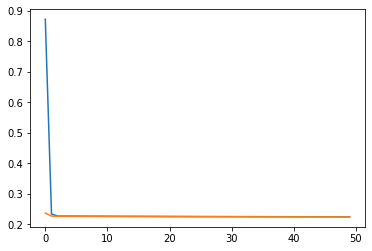

In [48]:
import matplotlib.pyplot as plt
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])

#model save

## ModelCheckpoint

In [49]:
import tensorflow as tf

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
Y = pd.get_dummies(iris.target)
# Y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data,Y,test_size = 0.3)
import os
# dense_kernel_regularizer = tf.keras.regularizers.l2(0.001)
model = tf.keras.Sequential()
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)
checkpoint_path = "./training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 체크포인트 콜백 만들기
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=False,
                                                 verbose=0)

model.compile(optimizer='SGD',
            loss='mean_squared_error',
            metrics=['accuracy','mean_squared_error'])
hist = model.fit(x_train, y_train, epochs=50, batch_size=256, validation_split=0.2,verbose=0, callbacks=[checkpoint_callback])

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to: ./training/cp.ckpt/assets
INFO:tensorflow:Assets written to:

In [50]:
load_checkpoint = model.load_weights(checkpoint_path)

OSError: Unable to open file (file read failed: time = Tue May  4 13:45:22 2021
, filename = './training/cp.ckpt', file descriptor = 64, errno = 21, error message = 'Is a directory', buf = 0x7ffee6b473d8, total read size = 8, bytes this sub-read = 8, bytes actually read = 18446744073709551615, offset = 0)

In [ ]:
load_checkpoint.

In [ ]:
load_checkpoint.expect_partial()

##model save

In [ ]:
model.save('./save_model.h5')

In [ ]:
new_model = tf.keras.models.load_model('./save_model.h5')
new_model.summary()
new_model.evaluate(x_test, y_test, verbose=2)

In [ ]:
print(type(new_model))